In [36]:
import random

import udahelpers
!wget -c https://raw.githubusercontent.com/MarwaQabeel/Udacity-Computer-Vision-Nanodegree/master/Part%201-%20Introduction%20to%20Computer%20Vision/1_1_Image_Representation/helpers.py

--2022-07-02 18:49:46--  https://raw.githubusercontent.com/MarwaQabeel/Udacity-Computer-Vision-Nanodegree/master/Part%201-%20Introduction%20to%20Computer%20Vision/1_1_Image_Representation/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [45]:
import cv2 # computer vision library

from udahelpers import load_dataset
# import torch

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [46]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = load_dataset(image_dir_training)

Shape: (458, 800, 3)
Label: day


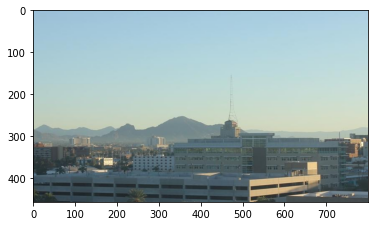

In [49]:
# Print out 1. The shape of the image and 2. The image's label

# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

In [56]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):

    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw)
    standard_im = cv2.resize(image,dsize=(1100,600))

    return standard_im

In [57]:
# Examples:
# encode("day") should return: 1
# encode("night") should return: 0
# import pandas as pd

def encode(label):

    numerical_val = 0
    ## TODO: complete the code to produce a numerical label

#     df = pd.DataFrame(IMAGE_LIST)
#     df = pd.get_dummies(df, columns = ['day','night'])

#     IMAGE_LIST_ENC = df.values.tolist()

    if label == 'day':
        numerical_val = 1
    else:
        numerical_val = 0

    return numerical_val
#     return IMAGE_LIST_ENC

In [58]:
def standardize(image_list):

    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)

        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))

    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


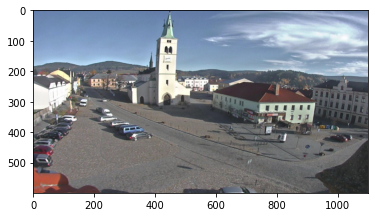

In [59]:
# Display a standardized image and its label

# Select an image by index
image_num = np.random.randint(len(IMAGE_LIST))
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

In [63]:
image_num

90

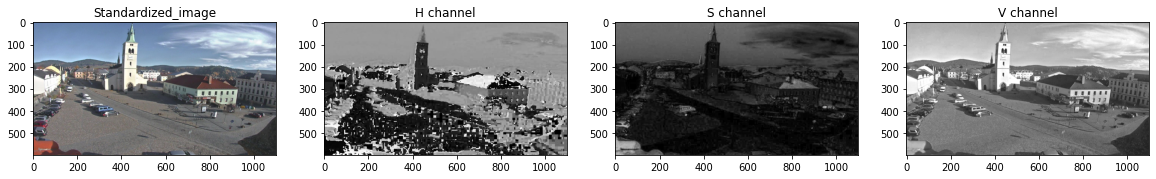

In [64]:
test_im = np.copy(selected_image)

hsv = cv2.cvtColor(test_im,cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))

ax1.set_title('Standardized_image')
ax1.imshow(test_im)

ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')

ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')

ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [65]:
def avg_brightness(rgb_image):

    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    sum_brightness = np.sum(hsv[:,:,2])

    area = 600.0 * 1100.0
    return sum_brightness/area

In [67]:
avg_brightness(test_im)

139.78603787878788

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 0


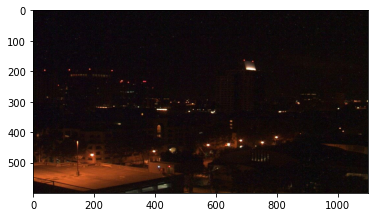

In [68]:
# Display a standardized image and its label

# Select an image by index
image_num = np.random.randint(len(IMAGE_LIST))
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

In [69]:
avg_brightness(selected_image)

26.067339393939395

Classification

In [71]:
def estimate_label(rgb_image):

    avg = avg_brightness(rgb_image)

    predicted_label = 0

    threshold = 100

    threshold = 100
    ## TODO: Return the predicted_label (0 or 1) based on whether the avg is
    if avg > threshold:
        predicted_label = 1
    else:
        predicted_label = 0

    return predicted_label

In [72]:
pred = estimate_label(selected_image)
print(pred)

0


In [74]:
import random

TEST_IMAGE_LIST = load_dataset(image_dir_test)
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

In [76]:
def get_misclassified_images(test_images):

    misclasified_images_labels = []

    for image in test_images:

        im = image[0]
        true_label = image[1]

        predicted_label= estimate_label(im)

        if (predicted_label != true_label):

            misclasified_images_labels.append((im,predicted_label,true_label))


    return misclasified_images_labels

In [77]:
MISSCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)

num_correct = total - len(MISSCLASSIFIED)

accuracy = num_correct/total

print(accuracy)
print(len(MISSCLASSIFIED))

0.925
12


0


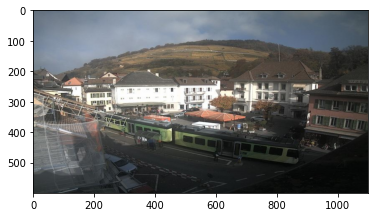

In [79]:
# Visualize misclassified example(s)
num = 0
test_mis_im = MISSCLASSIFIED[num][0]

## TODO: Display an image in the `MISCLASSIFIED` list
plt.imshow(test_mis_im)
## TODO: Print out its predicted label -
print(estimate_label(test_mis_im))
## to see what the image *was* incorrectly classified as